In [10]:
# Import des librairies

# Base

import pandas as pd

import numpy as np

import random

# Transformation

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Modèle

import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression


# Rééchantillonnage 

from imblearn.over_sampling import SMOTE, RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler

# Evaluation et métriques

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Viz

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 


In [11]:
df = pd.read_csv(r"C:\Users\lfbou\Documents\GitHub\meteo-australie-prediction\data\weatherAUS.csv")


In [12]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [15]:
# Recheche de NAN par colonne
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)
missing_percent[missing_percent > 0]

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
dtype: float64

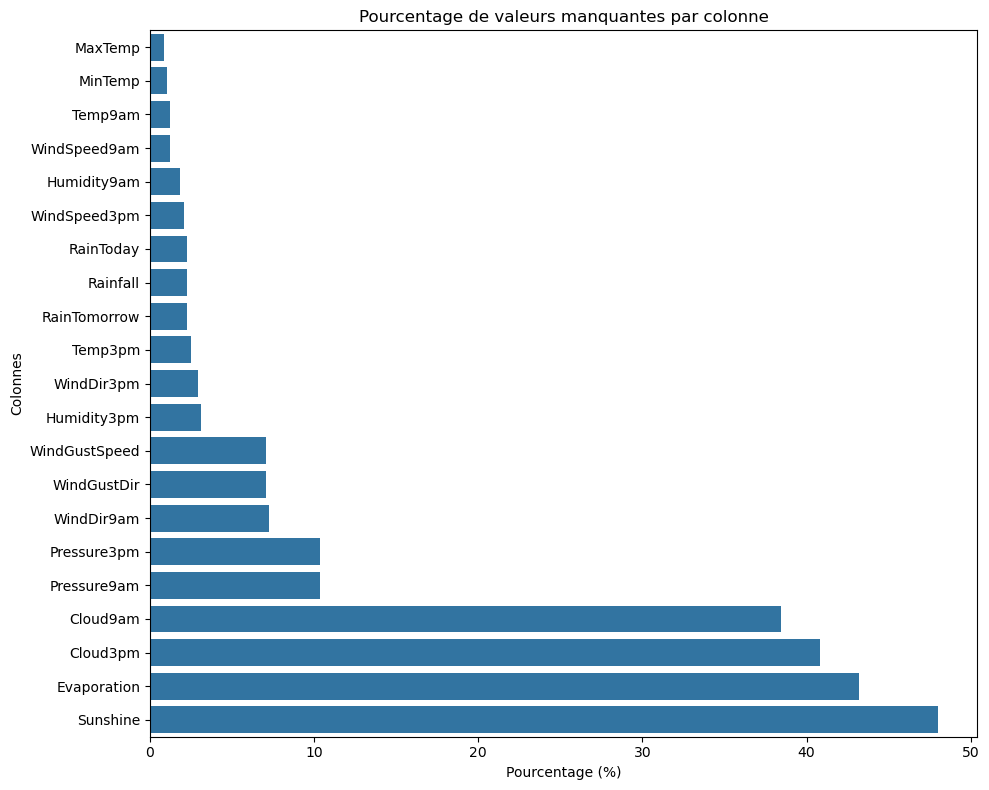

In [16]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.xlabel("Pourcentage (%)")
plt.ylabel("Colonnes")
plt.tight_layout()
plt.show()

In [17]:
# Sauvegarde de l'état actuel de la base avant traitements supplémentaires
df_clean = df.copy()


In [18]:
cols_to_drop = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df_clean.drop(columns=cols_to_drop, inplace=True)


In [19]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [21]:
# Imputation des valeurs manquantes pour les colonnes numériques
num_to_impute = ['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm']

for col in num_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [22]:
# Imputation des valeurs manquantes pour les colonnes catégorielles
cat_to_impute = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in cat_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [23]:
# Imputation des valeurs manquantes pour la colonne 'Rainfall'
df_clean['RainToday'] = df_clean['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No')


In [24]:
# Imputation de la colonne cible 'RainTomorrow'
df_clean = df_clean.dropna(subset=['RainTomorrow'])


In [25]:
# Vérification des valeurs manquantes restantes
df_clean.isnull().sum()


Date                0
Location            0
MinTemp           637
MaxTemp           322
Rainfall         1406
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am     1348
WindSpeed3pm     2630
Humidity9am      1774
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am           904
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [26]:
cols_remaining = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Temp9am']

for col in cols_remaining:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [27]:
df_clean.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

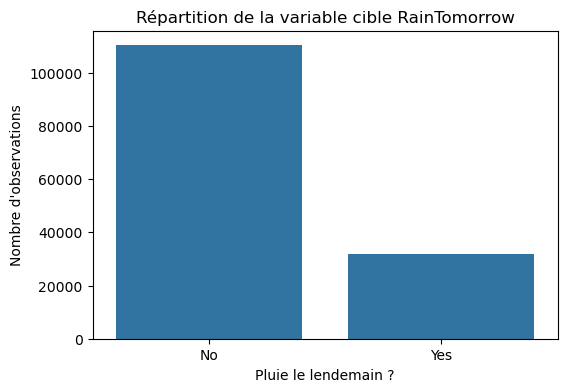

In [28]:

plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df_clean)
plt.title("Répartition de la variable cible RainTomorrow")
plt.xlabel("Pluie le lendemain ?")
plt.ylabel("Nombre d'observations")
plt.show()


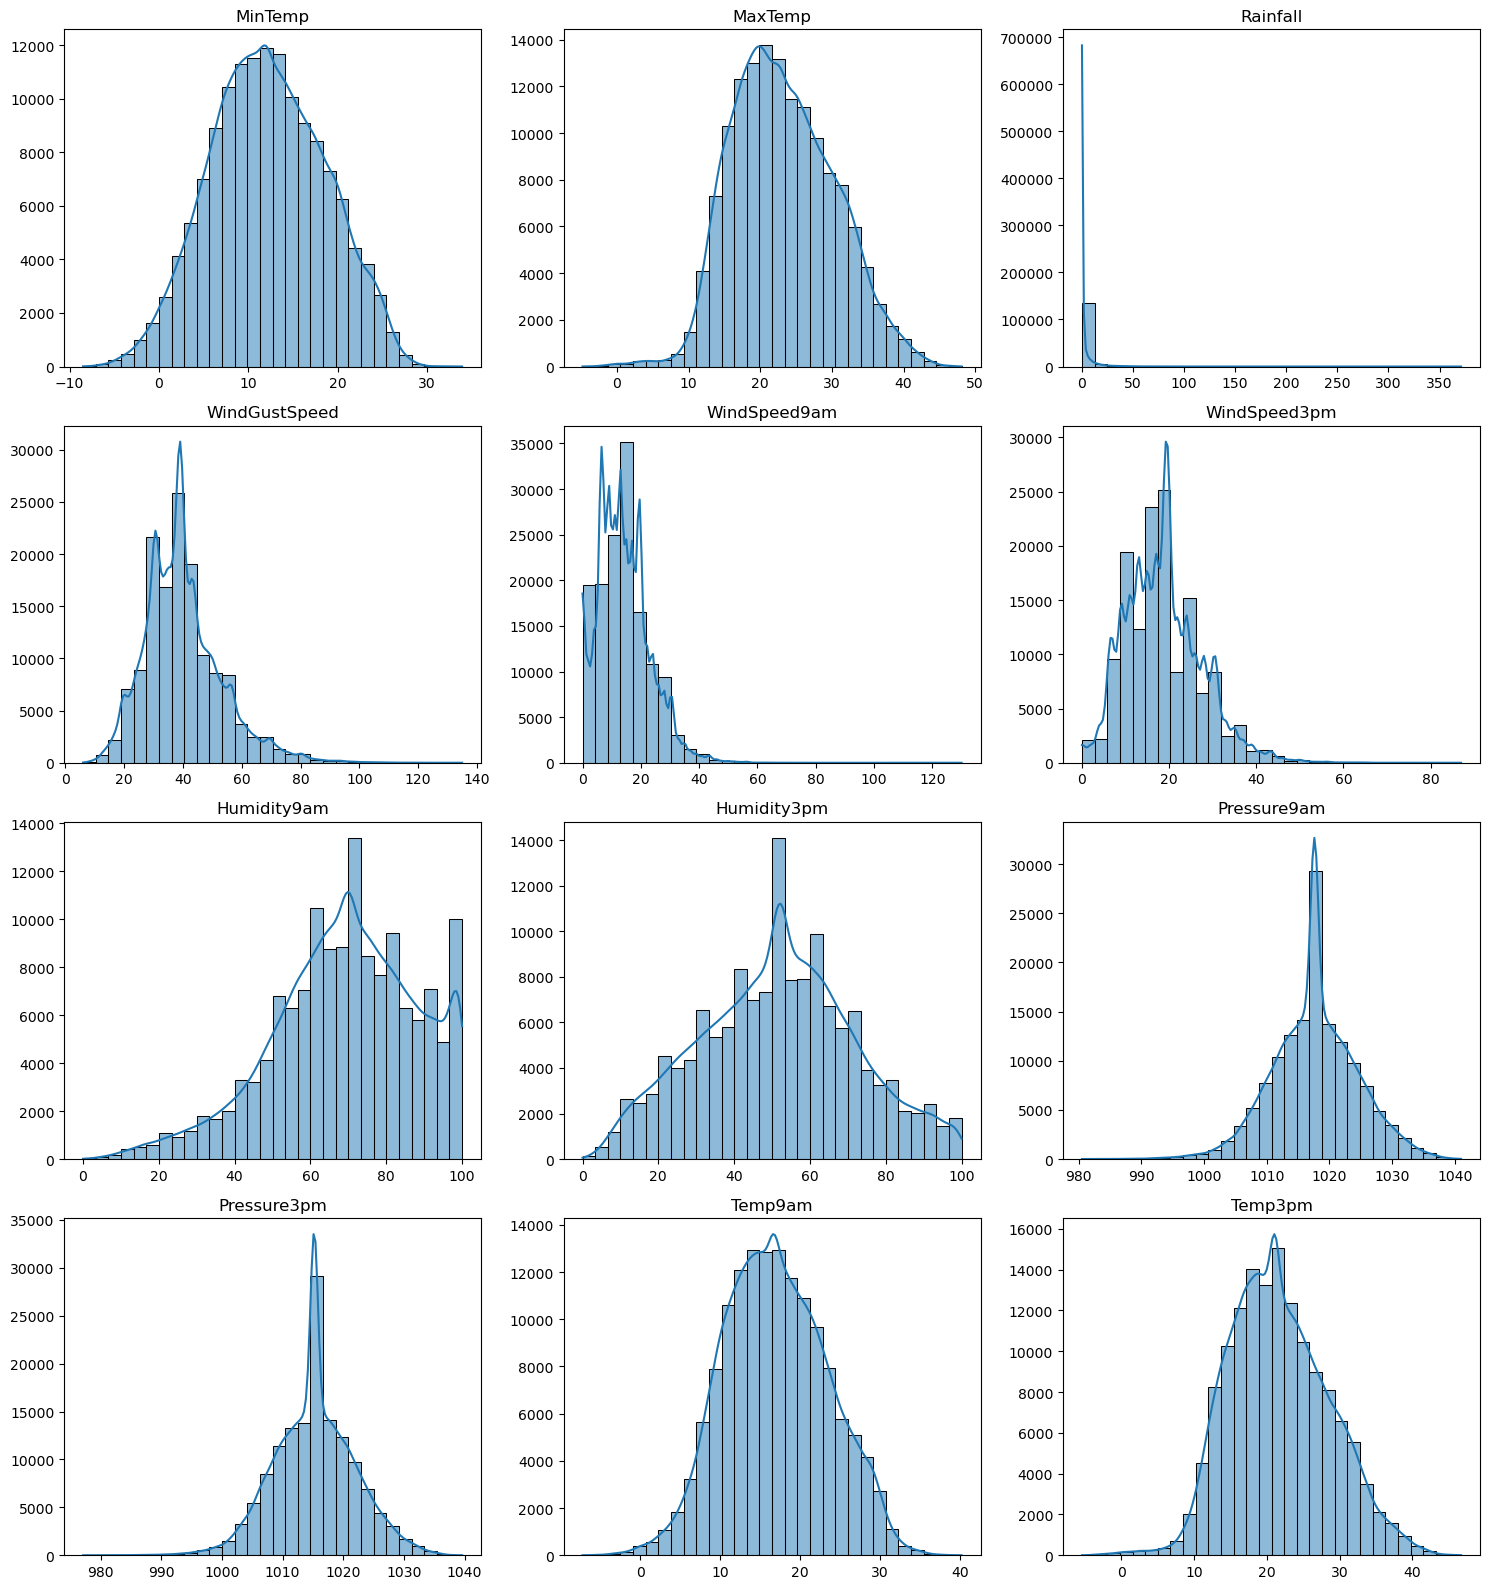

In [29]:

# Liste des variables numériques
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Définir le nombre de colonnes par ligne
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Création des sous-graphiques
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


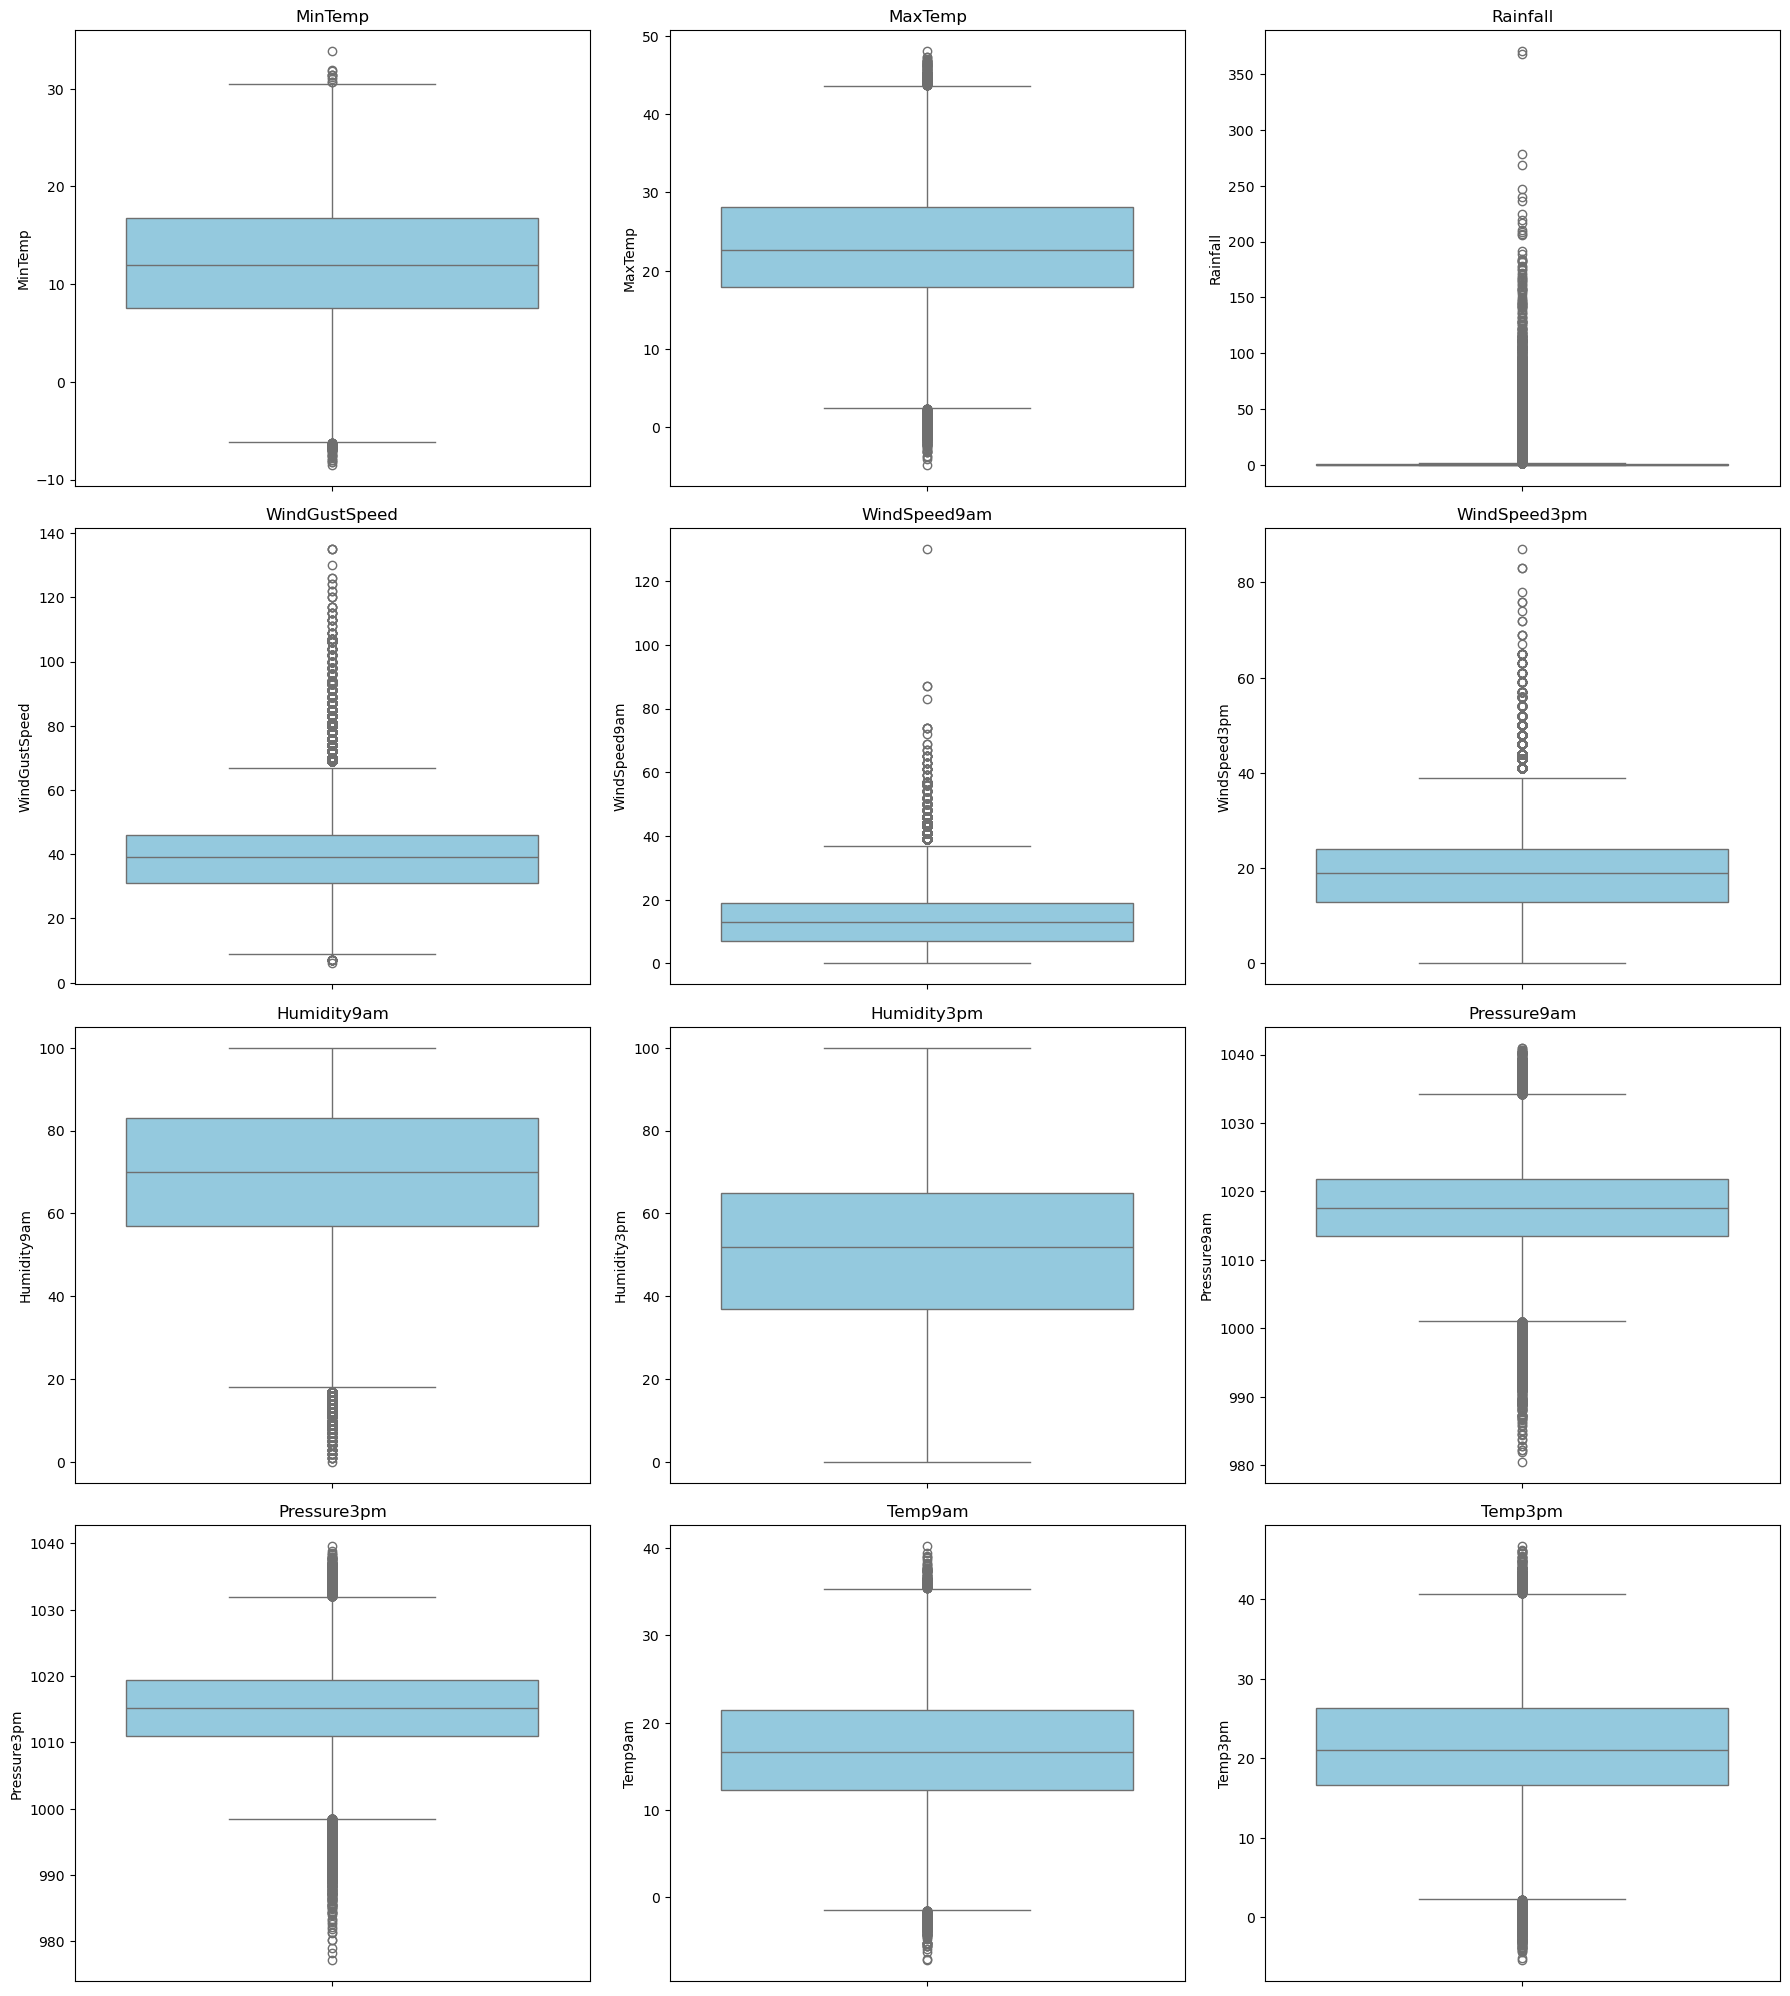

In [30]:
# Création de boxplots pour les variables numériques
# Sélection des colonnes numériques
num_cols = df_clean.select_dtypes(include='number').columns

# Définir la figure
plt.figure(figsize=(18, 25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(data=df_clean, y=col, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


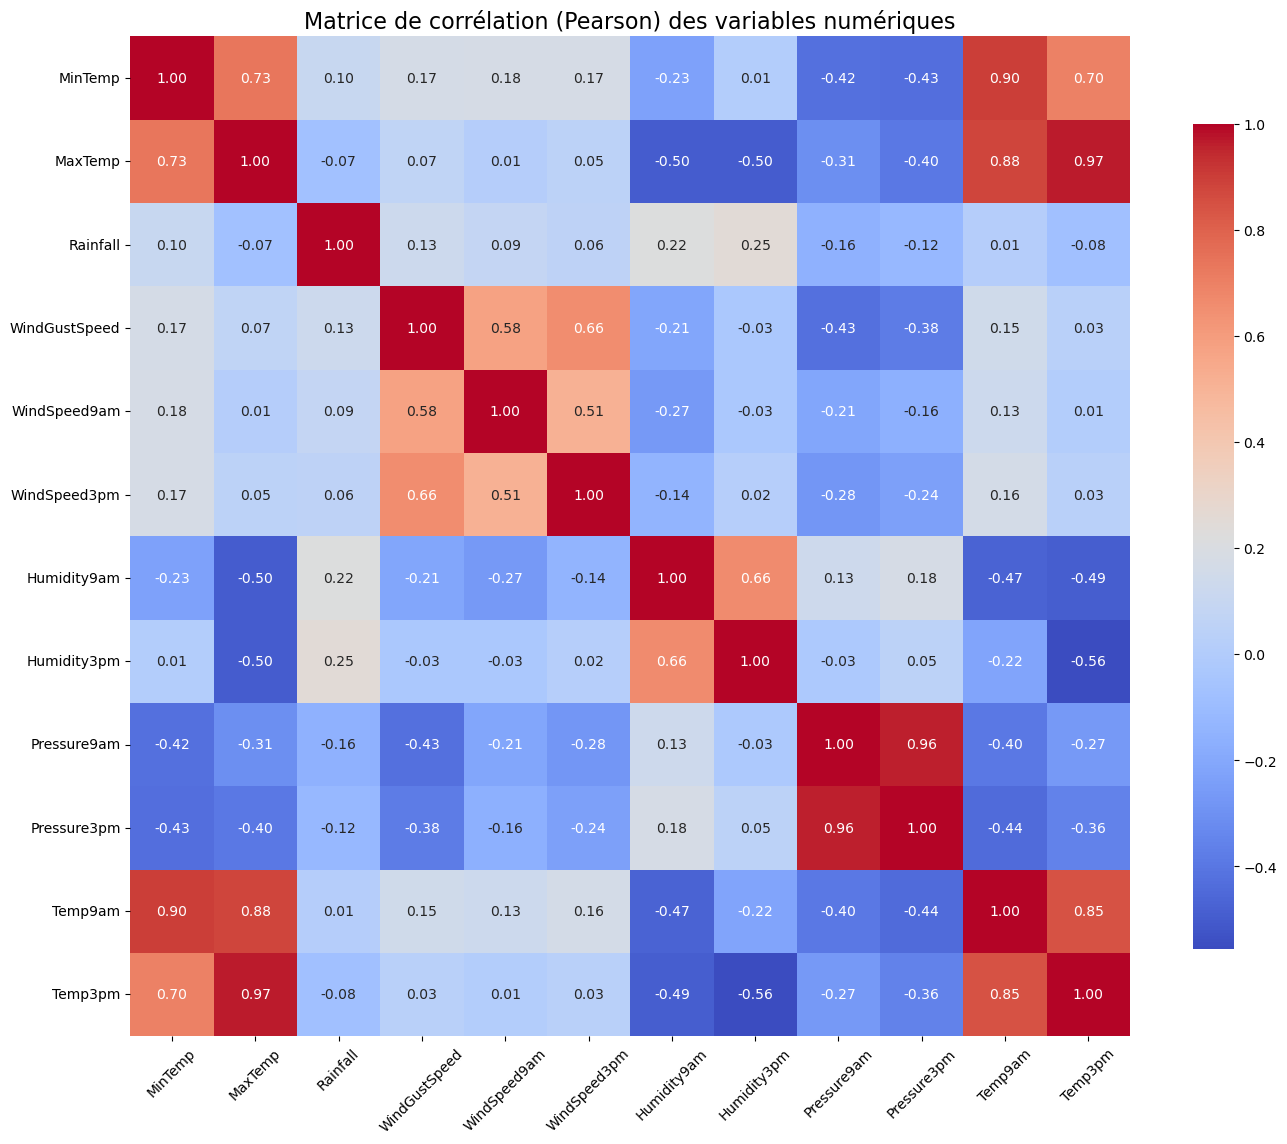

In [31]:
# Sélection uniquement des variables numériques
df_num = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation de Pearson
corr_matrix = df_num.corr(method='pearson')

# Affichage de la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title("Matrice de corrélation (Pearson) des variables numériques", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

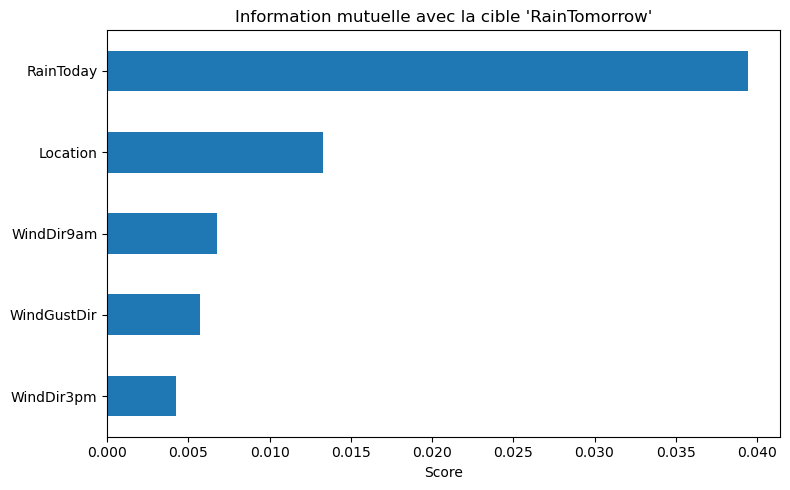

In [34]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Conversion de la colonne Date en datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d', errors='coerce')

# Sélection des colonnes catégorielles (hors cible)
cat_cols = df_clean.select_dtypes(include='object').columns.drop('RainTomorrow')

# Encodage des colonnes catégorielles car non exploitables par les modèles
df_encoded = df_clean.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Encodage de la cible
df_encoded['RainTomorrow'] = LabelEncoder().fit_transform(df_clean['RainTomorrow'])

# Séparation X (variables explicatives) / y (cible)
X = df_encoded[cat_cols]
y = df_encoded['RainTomorrow']

# Calcul de l'information mutuelle
importances = mutual_info_classif(X, y, discrete_features=True)

# Affichage
feat_importances = pd.Series(importances, index=cat_cols)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Information mutuelle avec la cible 'RainTomorrow'")
plt.xlabel("Score")
plt.tight_layout()
plt.show()


C:\Users\lfbou\AppData\Local\Temp\ipykernel_34676\3699083306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


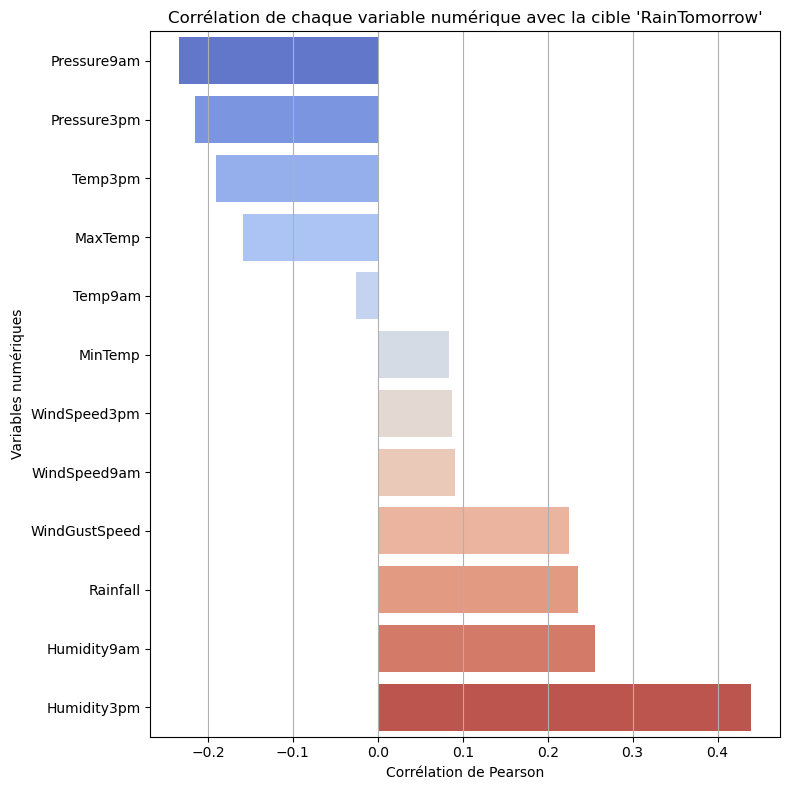

In [35]:
#Encodage de la cible (si ce n’est pas déjà fait)
df_clean['RainTomorrow'] = df_clean['RainTomorrow'].map({'No': 0, 'Yes': 1})

#Sélection des colonnes numériques
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('RainTomorrow')  # Exclure la cible

#Calcul des corrélations avec la cible
correlations = df_clean[numerical_cols].corrwith(df_clean['RainTomorrow']).sort_values()

#Affichage
plt.figure(figsize=(8, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Corrélation de chaque variable numérique avec la cible 'RainTomorrow'")
plt.xlabel("Corrélation de Pearson")
plt.ylabel("Variables numériques")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [36]:
# Liste des colonnes à supprimer
cols_to_drop = ['MinTemp', 'Temp9am', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am']

# Suppression des colonnes
df_clean.drop(columns=cols_to_drop, inplace=True)


In [37]:
df_clean.head()

,Date,Location,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,22.9,0.6,W,44.0,W,WNW,71.0,22.0,1007.1,21.8,Yes,0
1,2008-12-02,Albury,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1007.8,24.3,No,0
2,2008-12-03,Albury,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,1008.7,23.2,No,0
3,2008-12-04,Albury,28.0,0.0,NE,24.0,SE,E,45.0,16.0,1012.8,26.5,No,0
4,2008-12-05,Albury,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,1006.0,29.7,Yes,0


In [39]:
df_preprocessed.to_csv("weatherAUS_preprocessed.csv", index=False)
